# **Final Project Data, Business Analytics Departement HR**



| Variable                  | Description                                                                                                 |
| -------------             | ----------------------------------------------------------------------------------------------------------- |
| Fisrt_Name                | Nama depan pegawai                                                                                      |
| Last_name                 | Nama belakang pegawai                                                                                      |
| gender                    | Jenis kelamin                                                                                 |
| age                       | Usia pegawai                                                                                         |
| Length_service            | Lama pegawai bekerja diperusahaan The Looker (tahun)                                                                                         |
| Absent_Hours              | Lama absen dalam satu tahun (jam)                                                                                 |
| distribution_centers_id   | Distribution centers id    

> Pada data employee dan distribution_centers akan dilakukan segmentasi untuk melihat behaviour para pegawai The Look dengan menggunakan variabel gender, age, Length_Service, Absent_Hours, dan distribution_id

> Dengan melakukan segmentasi, diharapkan melalui proses clustering yang diperoleh dapat dilakukan analisa terhadap kelompok pegawai mana yang memiliki *similar pattern* 


##  Import Package and Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import pprint



In [ ]:
# Memanggil data Human Resources yang sudah disimpan dengan nama df_hr
df_hr = pd.read_csv('Data Join Human Resource.csv')

## Data Understanding

In [ ]:
df_hr

,fisrt_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,id,name,latitude,longitude
0,Gutierrez,Molly,F,32.028816,6.018478,36.577306,5,5,New Orleans LA,29.9500,-90.0667
1,Hardwick,Stephen,M,40.320902,5.532445,30.165072,9,9,Charleston SC,32.7833,-79.9333
2,Delgado,Chester,M,48.822047,4.389973,83.807798,10,10,Savannah GA,32.0167,-81.1167
3,Simon,Irene,F,44.599357,3.081736,70.020165,2,2,Chicago IL,41.8369,-87.6847
4,Delvalle,Edward,M,35.697876,3.619091,0.000000,4,4,Los Angeles CA,34.0500,-118.2500
...,...,...,...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,F,46.057544,4.838288,93.665111,9,9,Charleston SC,32.7833,-79.9333
8332,Cox,Jimmie,M,34.455490,2.427274,0.000000,1,1,Memphis TN,35.1174,-89.9711
8333,Hawkins,Mary,F,58.347160,4.009393,176.356940,9,9,Charleston SC,32.7833,-79.9333
8334,Proctor,Theresa,F,43.340616,6.154837,60.321917,7,7,Philadelphia PA,39.9500,-75.1667


In [ ]:
df_hr.shape

(8336, 11)

Ukuran matriks dataset Human Resource adalah 8336 x 7

In [ ]:
df_hr.columns

Index(['fisrt_name', 'last_name', 'gender', 'age', 'length_service',
       'absent_hours', 'distribution_centers_id', 'id', 'name', 'latitude',
       'longitude'],
      dtype='object')

Dengan perintah df_hr.columns akan dikeluarkan output nama nama kolom pada dataset dalam bentul list. Dalam output ini, ada terdapat 7 variabel yaitu First_Name, Last_Name, Gender, Age, Length_Service, Absent_Hours, distribution_centers_id

In [ ]:
df_hr.dtypes

fisrt_name                  object
last_name                   object
gender                      object
age                        float64
length_service             float64
absent_hours               float64
distribution_centers_id      int64
id                           int64
name                        object
latitude                   float64
longitude                  float64
dtype: object

Dengan menggunakan perintah .dtypes diperlihatkan tipe data yang akan diolah, terdapat 3 jenis tipe yaitu objek, float, dan integer

In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fisrt_name               8336 non-null   object 
 1   last_name                8336 non-null   object 
 2   gender                   8336 non-null   object 
 3   age                      8336 non-null   float64
 4   length_service           8336 non-null   float64
 5   absent_hours             8336 non-null   float64
 6   distribution_centers_id  8336 non-null   int64  
 7   id                       8336 non-null   int64  
 8   name                     8336 non-null   object 
 9   latitude                 8336 non-null   float64
 10  longitude                8336 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 716.5+ KB


Bisa dilihat pada output yang keluar, tidak terdapat data Null yang dimana semua rows pada table terisi 

In [ ]:
df_hr.isnull()

,fisrt_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,id,name,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8331,False,False,False,False,False,False,False,False,False,False,False
8332,False,False,False,False,False,False,False,False,False,False,False
8333,False,False,False,False,False,False,False,False,False,False,False
8334,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_hr.isnull().sum()

fisrt_name                 0
last_name                  0
gender                     0
age                        0
length_service             0
absent_hours               0
distribution_centers_id    0
id                         0
name                       0
latitude                   0
longitude                  0
dtype: int64

Terlihat bahwa tidak ada missing values pada setiap kolom pada data transaksi di atas.

In [ ]:
!pip install plotly

import pandas as pd
import plotly.express as px

fig= px.scatter_geo(df_hr, lat='latitude', 
                       lon='longitude',
                       hover_name="name")
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# First_Name dan Last_Name akan digabungkan sehingga menjadi Full_Name dengan fungsi berikut
cols=['fisrt_name', 'last_name']
df_hr['full_name']=
df_hr[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
first_column = df_hr.pop('full_name')
df_hr.insert(0, 'full_name', first_column)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(df_hr['gender'])
print(gender_encoded)

[0 1 1 ... 0 0 1]


Akan diganti gender menjadi kode 1 untuk gender male dan 0 untuk gender female, agar variabel gendel menjadi atribut numerik
> Dengan diubahnya gender menjadi encoded_gender, maka encoded_gender nantinya akan dimasukkan kedalam model yang akan dilakukan

In [ ]:
df_hr['encoded_gender'] = gender_encoded
print(df_hr)

             full_name fisrt_name last_name gender        age  length_service  \
0      Gutierrez Molly  Gutierrez     Molly      F  32.028816        6.018478   
1     Hardwick Stephen   Hardwick   Stephen      M  40.320902        5.532445   
2      Delgado Chester    Delgado   Chester      M  48.822047        4.389973   
3          Simon Irene      Simon     Irene      F  44.599357        3.081736   
4      Delvalle Edward   Delvalle    Edward      M  35.697876        3.619091   
...                ...        ...       ...    ...        ...             ...   
8331   Coniglio Bianca   Coniglio    Bianca      F  46.057544        4.838288   
8332        Cox Jimmie        Cox    Jimmie      M  34.455490        2.427274   
8333      Hawkins Mary    Hawkins      Mary      F  58.347160        4.009393   
8334   Proctor Theresa    Proctor   Theresa      F  43.340616        6.154837   
8335    Salter Charles     Salter   Charles      M  46.192782        5.174722   

      absent_hours  distrib

In [ ]:
df_hr.drop(['last_name', 
            'fisrt_name',
            'latitude',
            'longitude',
            'distribution_centers_id',
            'full_name',
            'gender',
            'name'], inplace=True, axis=1)

In [ ]:
df_hr

,age,length_service,absent_hours,id,encoded_gender
0,32.028816,6.018478,36.577306,5,0
1,40.320902,5.532445,30.165072,9,1
2,48.822047,4.389973,83.807798,10,1
3,44.599357,3.081736,70.020165,2,0
4,35.697876,3.619091,0.000000,4,1
...,...,...,...,...,...
8331,46.057544,4.838288,93.665111,9,0
8332,34.455490,2.427274,0.000000,1,1
8333,58.347160,4.009393,176.356940,9,0
8334,43.340616,6.154837,60.321917,7,0


## Exploratory Data Analysis

### Data Visualization

In [ ]:
df_hr.loc[0]

age               32.028816
length_service     6.018478
absent_hours      36.577306
id                 5.000000
encoded_gender     0.000000
Name: 0, dtype: float64

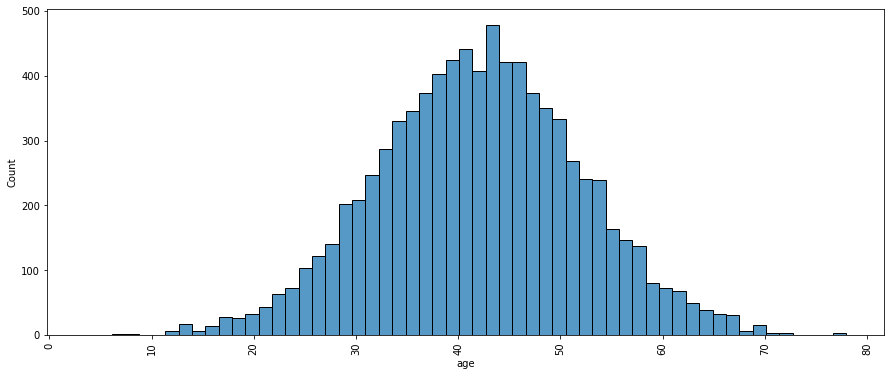

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df_hr['age'], palette='hls')
plt.xticks(rotation=90)
plt.show()

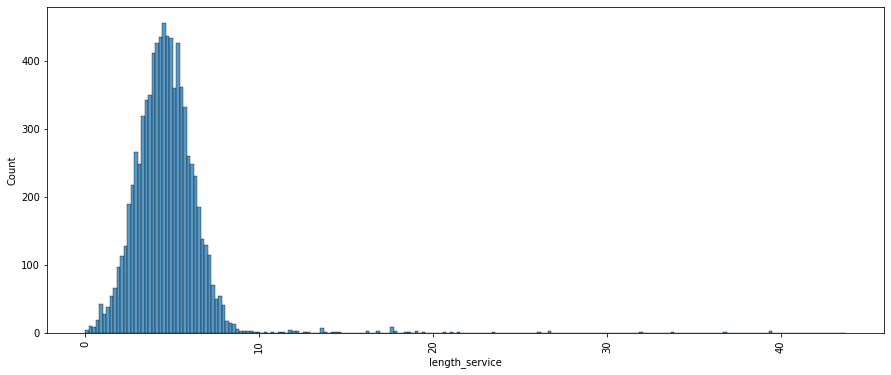

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df_hr['length_service'], palette='hls')
plt.xticks(rotation=90)
plt.show()

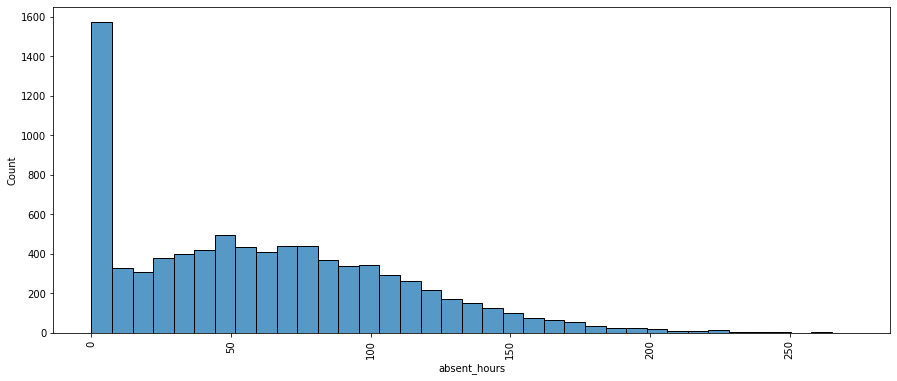

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df_hr['absent_hours'], palette='hls')
plt.xticks(rotation=90)
plt.show()

Dilihat melalui visualisasi data dalam boxplot dan histplot, diambuil insight bahwa di dalam dataframe masih ada 3 variabel yang mengandung banyak outlier. Yang dimana untuk mempertinggi tingkat akurasi data, maka harus di impute nantinya dengan metode IQR

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#14595e"]   
OTHER_COLOR = ["#777777"] 

In [ ]:
df_hr['encoded_gender'].value_counts()

1    4216
0    4120
Name: encoded_gender, dtype: int64

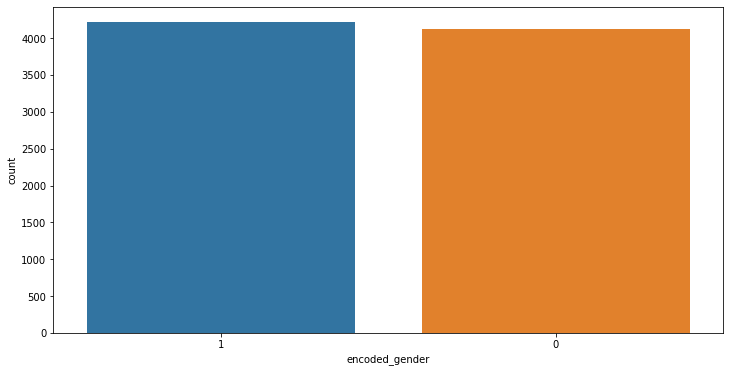

In [ ]:
plot_count(x="encoded_gender", data=df_hr)
plt.show()

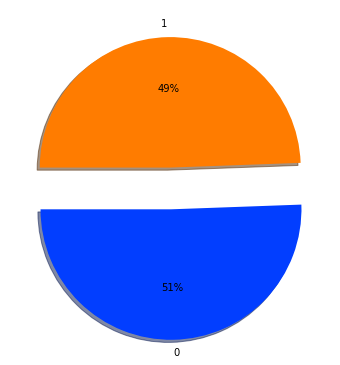

In [ ]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode =[0.3, 0.02]
plt.pie(df_hr['encoded_gender'].value_counts(), colors = colors,
        labels=[0,1], autopct='%0.f%%', shadow='True',
        explode=explode,startangle=180)
plt.show()

Dengan fungsi .value_counts() dapat ditunjukkan jumlah pegawai The Look yang wanita dan laki-laki. Diperoleh data bahwa terdapat 4216 pegawai laki-laki dan 4120 pegawai wanita

Terlihat penyebaran karyawan yang terdapat pada setiap lokasi, bisa dilihat bahwa negara dengan karyawan terbanyak berada di

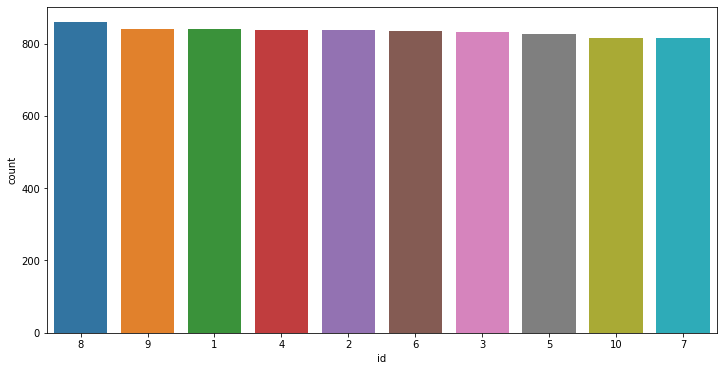

In [ ]:
plot_count(x='id', data=df_hr)
plt.show()

### Analysis Variable Length_Service, Absent_hours, age

#### Handling Outlier Length_Service

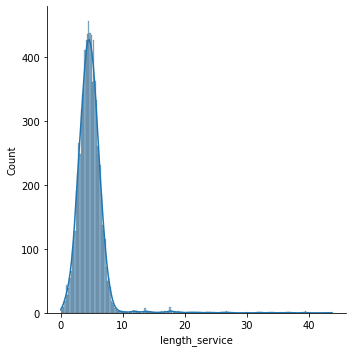

In [ ]:
sns.displot(df_hr['length_service'],kde=True)

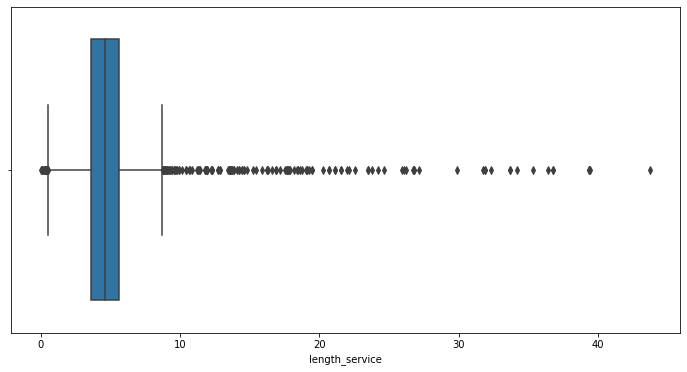

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='length_service', data=df_hr)
plt.show()

In [ ]:
def batas_atas(df_hr):
  Q3 = np.quantile(df_hr['length_service'], 0.75)
  Q1 = np.quantile(df_hr['length_service'], 0.25)
  IQR = Q3 - Q1

  lower_boundaries = Q1 - 1.5 * IQR
  upper_boundaries = Q3 + 1.5 * IQR

  print(f'lower boundaries = {lower_boundaries}')
  print(f'upper boundaries = {upper_boundaries}')

In [ ]:
print('base model :')
batas_atas(df_hr)

base model :
lower boundaries = 0.5038469635
upper boundaries = 8.695966843499999


In [ ]:
def imput3_outlier(df_hr, upper_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.length_service > upper_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.length_service > upper_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['length_service']>=upper_bound, 'length_service']=upper_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
imput3_outlier(df_hr, upper_bound=8.695)

sum of outlier : 142
outlier : 
[   6    9   15   16   19   28   31   35   49   61   67   69   86   87
  102  127  134  136  137  143  144  145  160  164  169  174  185  190
  208  209  216  217  221  227  232  302  308  312  316  320  321  323
  324  350  351  354  361  371  390  401  405  410  415  421  426  435
  437  451  463  465  468  479  482  485  494  500  501  504  518  694
  715  996 1317 1318 1319 1322 1323 1327 1337 1340 1343 1345 1350 1351
 1356 1359 1365 1371 1379 1380 1381 1384 1389 1391 1394 1399 1405 1408
 1412 1413 1440 1447 1457 1460 1462 1468 1469 1474 1479 1484 1485 1486
 1487 1496 1497 1499 1515 1516 1522 1523 1528 1534 1549 1559 1578 2058
 2114 2462 3887 4231 4481 5096 5321 5328 5578 6133 6412 6420 6443 6515
 7009 7445]



Outlier berhasil di impute!


In [ ]:
imput3_outlier(df_hr, upper_bound=8.695)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


In [ ]:
def input3_outlier(df_hr, lower_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.length_service < lower_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.length_service < lower_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['length_service']<= lower_bound, 'length_service']= lower_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
input3_outlier(df_hr, lower_bound=0.503)

sum of outlier : 21
outlier : 
[  51  746 1033 2096 2460 2661 3129 3234 3404 3581 3895 4058 4243 5509
 6587 6593 6898 7014 7685 7907 8307]



Outlier berhasil di impute!


In [ ]:
input3_outlier(df_hr, lower_bound=0.503)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


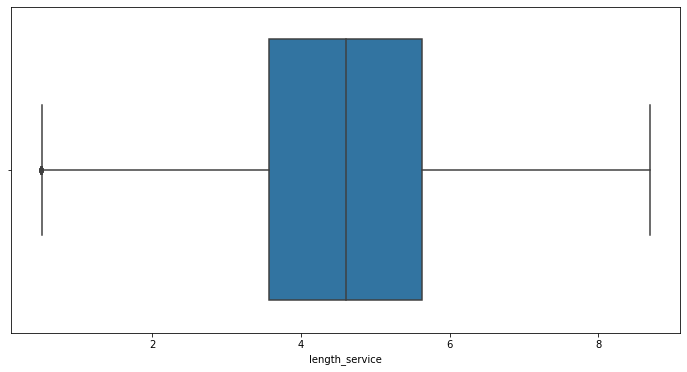

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='length_service', data=df_hr)
plt.show()

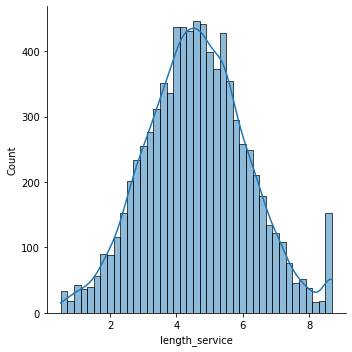

In [ ]:
sns.displot(df_hr['length_service'],kde=True)

#### Handling Outlier Absent_hours

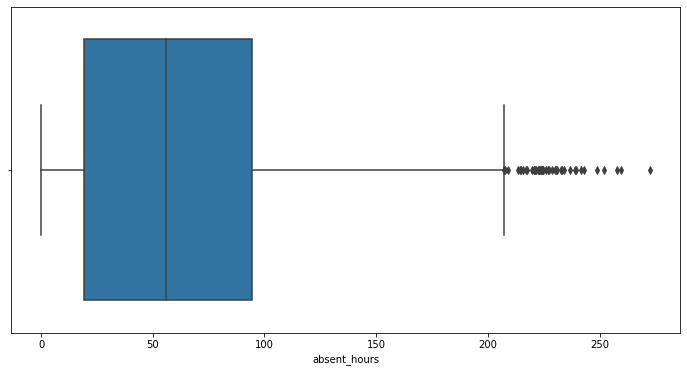

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='absent_hours', data=df_hr)
plt.show()

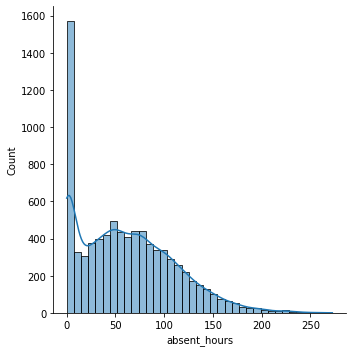

In [ ]:
sns.displot(df_hr['absent_hours'],kde=True)

In [ ]:
def batas_atas(df_hr):
  Q3 = np.quantile(df_hr['absent_hours'], 0.75)
  Q1 = np.quantile(df_hr['absent_hours'], 0.25)
  IQR = Q3 - Q1

  lower_boundaries = Q1 - 1.5 * IQR
  upper_boundaries = Q3 + 1.5 * IQR

  print(f'lower boundaries = {lower_boundaries}')
  print(f'upper boundaries = {upper_boundaries}')

In [ ]:
print('base model :')
batas_atas(df_hr)

base model :
lower boundaries = -93.60806295
upper boundaries = 207.02034445


In [ ]:
def imput3_outlier(df_hr, upper_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.absent_hours > upper_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.absent_hours > upper_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['absent_hours']>=upper_bound, 'absent_hours']=upper_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
imput3_outlier(df_hr, upper_bound=207.020)

sum of outlier : 44
outlier : 
[ 159  344  658 1043 1055 1273 1436 1546 1601 2206 2391 2436 3176 3235
 3619 3637 4039 4135 4176 4206 4482 4488 4589 4731 5160 5427 5495 5536
 5803 5890 5967 6057 6359 6669 6757 6792 7062 7323 7370 7388 7795 7929
 7931 8241]



Outlier berhasil di impute!


In [ ]:
imput3_outlier(df_hr, upper_bound=207.020)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


In [ ]:
def input3_outlier(df_hr, lower_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.absent_hours < lower_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.absent_hours < lower_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['absent_hours']<= lower_bound, 'absent_hours']= lower_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
input3_outlier(df_hr, lower_bound=-93.608)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


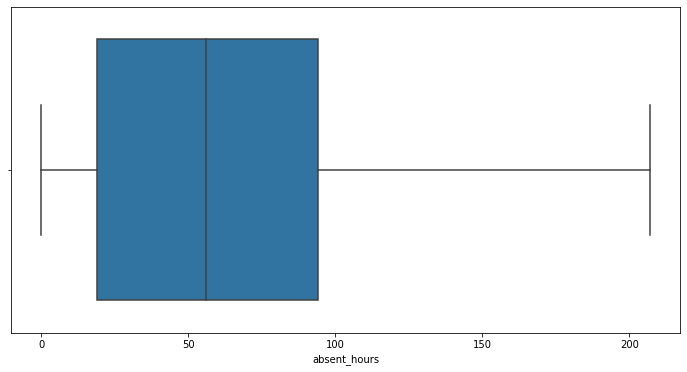

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='absent_hours', data=df_hr)
plt.show()

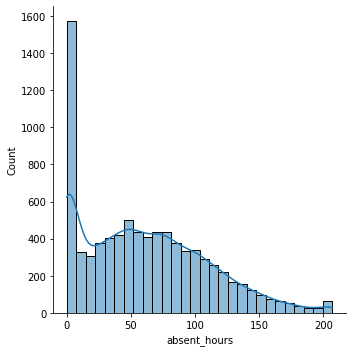

In [ ]:
sns.displot(df_hr['absent_hours'],kde=True)

#### Handling Outlier Age

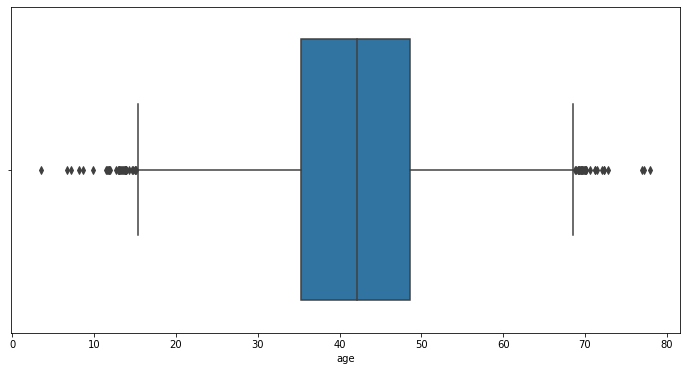

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=df_hr)
plt.show()

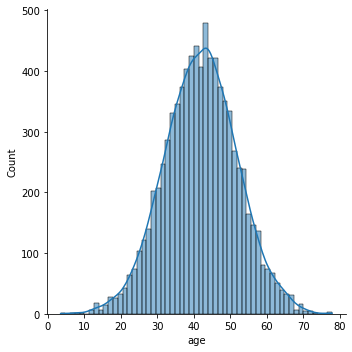

In [ ]:
sns.displot(df_hr['age'],kde=True)

In [ ]:
def batas_atas(df_hr):
  Q3 = np.quantile(df_hr['age'], 0.75)
  Q1 = np.quantile(df_hr['age'], 0.25)
  IQR = Q3 - Q1

  lower_boundaries = Q1 - 1.5 * IQR
  upper_boundaries = Q3 + 1.5 * IQR

  print(f'lower boundaries = {lower_boundaries}')
  print(f'upper boundaries = {upper_boundaries}')

In [ ]:
print('base model :')
batas_atas(df_hr)

base model :
lower boundaries = 15.246456026250012
upper boundaries = 68.71923567625


In [ ]:
def imput3_outlier(df_hr, upper_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.age > upper_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.age > upper_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['age']>=upper_bound, 'age']=upper_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
imput3_outlier(df_hr, upper_bound=68.719)

sum of outlier : 28
outlier : 
[  33  572 1273 1383 1436 1546 1940 2133 2224 2436 3210 3755 3790 3829
 4039 4176 4482 5048 5322 5702 5967 6359 6792 7370 7641 7795 8102 8172]



Outlier berhasil di impute!


In [ ]:
imput3_outlier(df_hr, upper_bound=68.719)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


In [ ]:
def imput3_outlier(df_hr, lower_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df_hr.age < lower_bound)
  print(f'sum of outlier : {np.count_nonzero(df_hr.age < lower_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

   ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)

    if __name__ == '__main__':
      message(proses, loading)

  ## kode untuk impute outlier
  df_hr.loc[df_hr['age']<= lower_bound, 'age']= lower_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
imput3_outlier(df_hr, lower_bound=15.24645)

sum of outlier : 36
outlier : 
[  11  213  291  328  513  526  568 1006 1099 1512 1636 2246 2422 2731
 2768 3041 3231 3673 3853 4113 4772 5127 5314 5980 6524 6610 6854 6942
 7730 7947 8095 8114 8133 8284 8298 8323]



Outlier berhasil di impute!


In [ ]:
imput3_outlier(df_hr, lower_bound=15.24645)

sum of outlier : 0
outlier : 
[]



Outlier berhasil di impute!


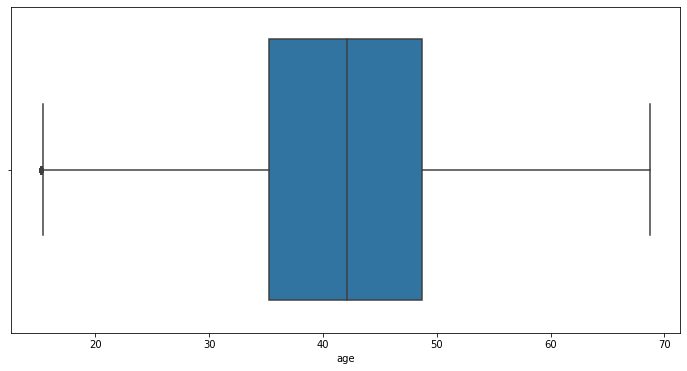

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=df_hr)
plt.show()

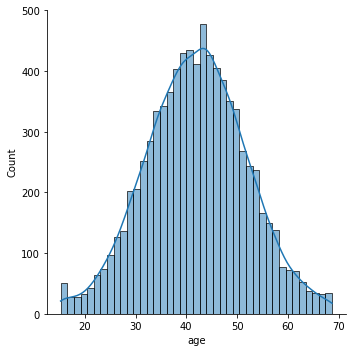

In [ ]:
sns.displot(df_hr['age'],kde=True)

### Korelasi

In [ ]:
df_hr.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
age,8336.0,42.012,9.880,15.246,35.299,42.115,48.667,68.719
length_service,8336.0,4.632,1.559,0.503,3.576,4.600,5.624,8.695
absent_hours,8336.0,61.171,48.666,0.000,19.128,56.006,94.285,207.020
id,8336.0,5.494,2.872,1.000,3.000,5.000,8.000,10.000
encoded_gender,8336.0,0.506,0.500,0.000,0.000,1.000,1.000,1.000


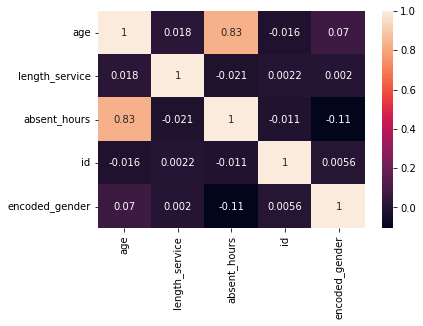

In [ ]:
sns.heatmap(df_hr.corr(), annot=True)
plt.show()

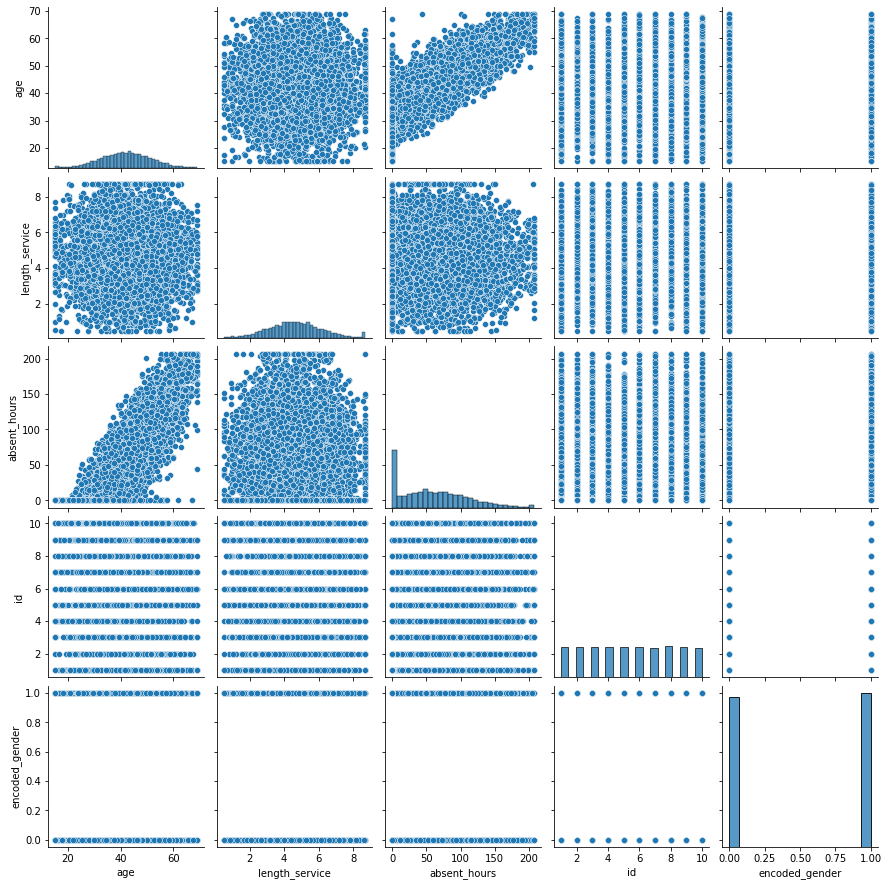

In [ ]:
sns.pairplot(df_hr, palette='hls')
plt.show()

(0.0, 71.39262749999999)

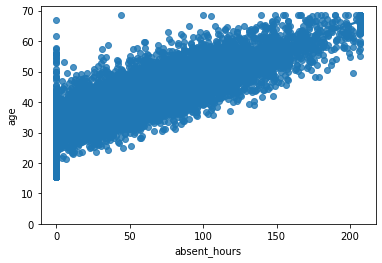

In [ ]:
sns.regplot(x=df_hr["absent_hours"],y=df_hr["age"],data=df_hr)
plt.ylim(0,)

(0.0, 71.39262749999999)

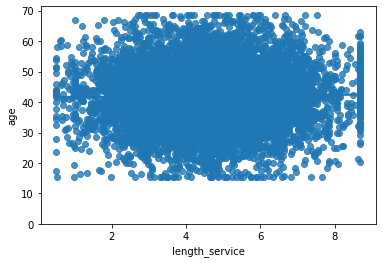

In [ ]:
sns.regplot(x=df_hr["length_service"],y=df_hr["age"],data=df_hr)
plt.ylim(0,)

## Modelling Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Model Development

* Akan disegmentasikan para pegawai berdasarkan lama bekerja, usia, gender, dan lama waktu absent, sehingga data yang dipilih ada data df_hr yang merupakan numerikal

In [ ]:
x = np.asarray(df_hr.copy())

In [ ]:
columns=['age', 'length_service','encoded_gender', 'absent_hours']

### Data Preparation

Persiapan data yang dilakukan adalah:
* Melakukan standardisasi semua fitur numerik yang sudah terbentuk

In [ ]:
scale = StandardScaler()
x = scale.fit_transform(x)
x_scaled = pd.DataFrame(x, columns=df_hr.columns)

In [ ]:
x_scaled.head()

,age,length_service,absent_hours,id,encoded_gender
0,-1.010503,0.889235,-0.505384,-0.171906,-1.011583
1,-0.171163,0.577403,-0.637151,1.220718,0.988549
2,0.689339,-0.155589,0.465168,1.568874,0.988549
3,0.261911,-0.994933,0.181842,-1.216375,-1.011583
4,-0.639114,-0.650174,-1.257021,-0.520062,0.988549


### K-Means

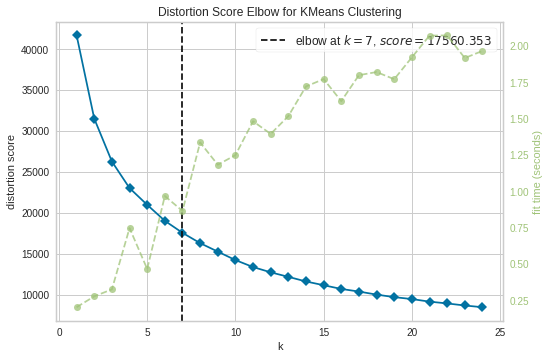

In [ ]:
model = KMeans(random_state=42)
viz = KElbowVisualizer(model, k=(1,25))

viz.fit(x_scaled)
viz.show()

Untuk menentukan nilai K saya menggunakan library yellowbrick agar lebih cepat dan singkat untuk code nya

**Membuat model cluster berdasarkan k yang sudah diperoleh**

In [ ]:
kmean = KMeans(viz.elbow_value_, random_state=42)
kmean.fit(x)
labels = kmean.labels_
# labels = kmean.fit_predict(x)

In [ ]:
df_hr['labels'] = labels
x_scaled['labels'] = labels

Menambah kolom label yang berisi hasil prediksi clustering menggunakan K-Means

In [ ]:
df_hr

,age,length_service,absent_hours,id,encoded_gender,labels
0,32.028816,6.018478,36.577306,5,0,1
1,40.320902,5.532445,30.165072,9,1,3
2,48.822047,4.389973,83.807798,10,1,3
3,44.599357,3.081736,70.020165,2,0,1
4,35.697876,3.619091,0.000000,4,1,6
...,...,...,...,...,...,...
8331,46.057544,4.838288,93.665111,9,0,5
8332,34.455490,2.427274,0.000000,1,1,6
8333,58.347160,4.009393,176.356940,9,0,5
8334,43.340616,6.154837,60.321917,7,0,2


**Melihat persebaran cluster dengan pie plot**

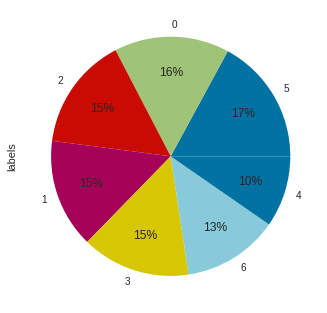

In [ ]:
x_scaled.labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

Melalui pie plot yang diperoleh dapat disimpulkan bahwa:
* Label 5 merupakan kelompok cluster yang memiliki jumlah anggota paling banyak yaitu **17%**
* Label 6 merupakan peringkat kedua label yang memiliki kelompok cluster terbesar
* Diikuti oleh label 1, 2, 3 masing masing menghasilkan **15%** 
* Label 4 dan 6 berada pada clustering dengan kelompok paling sedikit 

**Membuat visualisasi untuk menginterpretasikan tiap cluster yang ada**

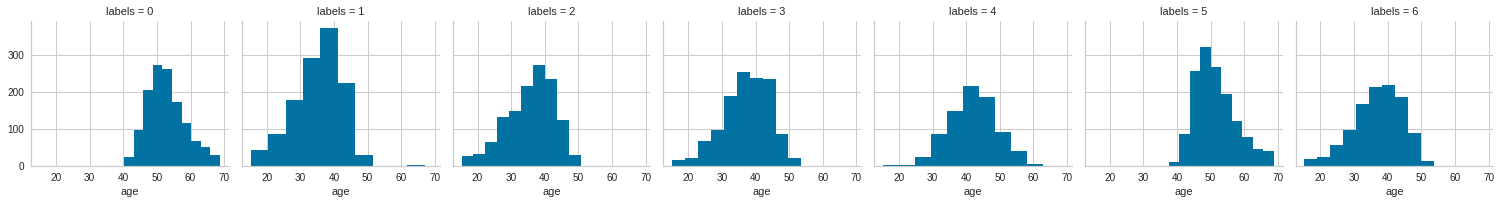

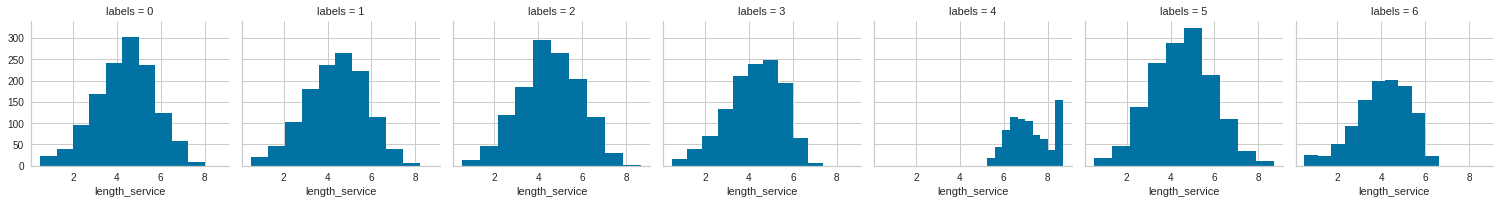

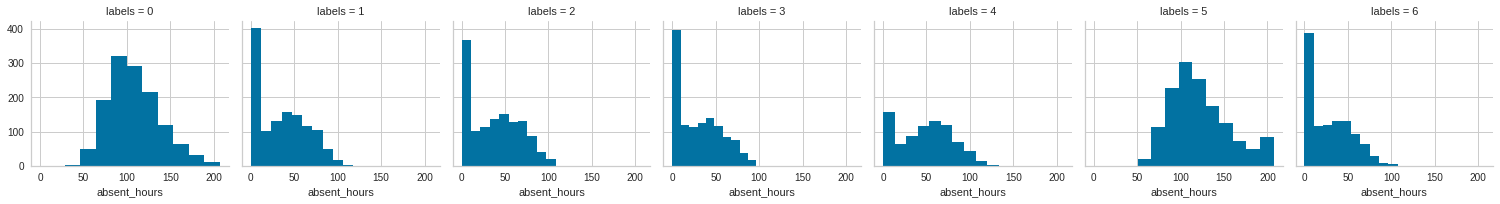

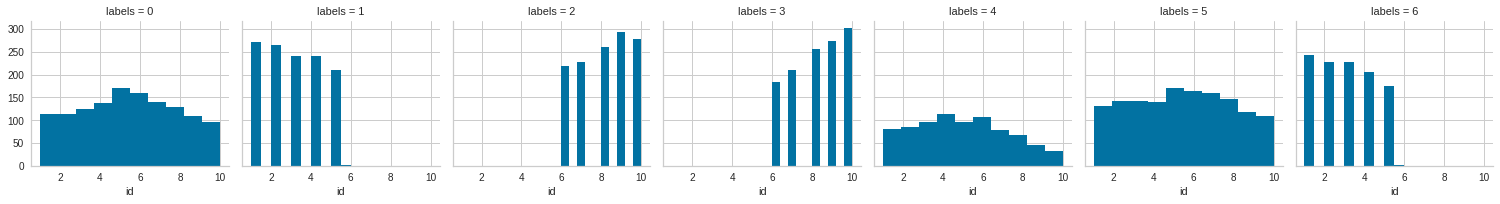

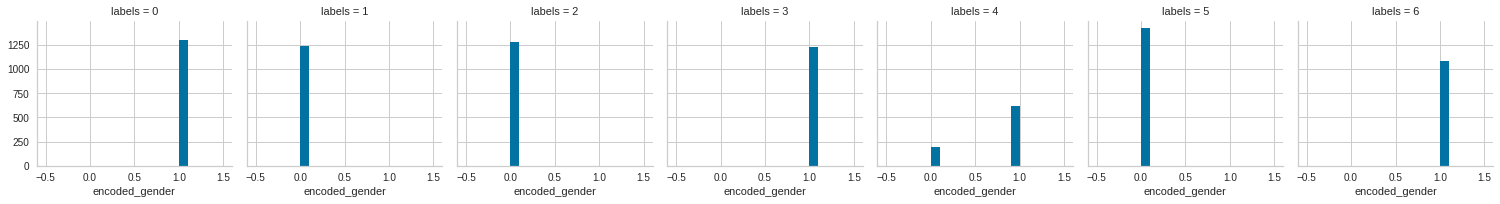

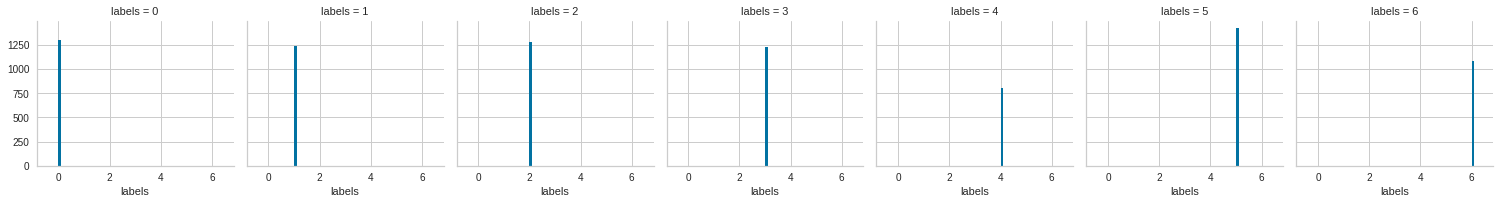

In [ ]:
for col in df_hr:
    grid= sns.FacetGrid(df_hr, col='labels')
    grid.map(plt.hist, col)

> **Insight**
Dari visualisasi grafik diatas dapat disimpulkan bahwa:


*   ***Label 0***
> Pada segmentasi cluster label 0 diperoleh informasi bahwa rata rata pegawai berjumlah **40 - 70 thn**, didominasi oleh **wanita**, rentang lama bekerja berada pada **1-8 thn**, awaktu absent **50-200 jam **, dan ID menyebar dari **1-10**

* ***Label 1***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **<20 - 50 thn**, didominasi oleh **pria**, rentang lama bekerja berada pada **1-8 thn**, awaktu absent **0-100 jam**, dan ID menyebar dari **1-6**

* ***Label 2***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **<20 - 50 thn**, didominasi oleh **pria**, rentang lama bekerja berada pada **1-9 thn**, waktu absent **0-110 jam**, dan ID menyebar dari **6-10**

* ***Label 3***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **<20 - 55 thn**, didominasi oleh **wanita**, rentang lama bekerja berada pada **1-7 thn**, waktu absent **0-90 jam**, dan ID menyebar dari **6-10**

* ***Label 4***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **35 - 68 thn**, didominasi oleh **wanita** dan sedikit **pria**, rentang lama bekerja berada pada **5-10 thn**, waktu absent **0-125 jam**, dan ID menyebar dari **1-10**

* ***Label 5***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **38 - 68 thn**, didominasi oleh **pria** dan sedikit **pria**, rentang lama bekerja berada pada **0-9 thn**, waktu absent **50-210 jam**, dan ID menyebar dari **1-10**

* ***Label 6***
> Pada segmentasi cluster label 1 diperoleh informasi bahwa rata rata pegawai berjumlah **<20 - 55 thn**, didominasi oleh **wanita** dan sedikit **pria**, rentang lama bekerja berada pada **0-7 thn**, waktu absent **0-100 jam**, dan ID menyebar dari **1-6**







**Membuat visualisasi untuk cluster dengan melakukan PCA**

In [ ]:
pca = PCA(2)
x_pca = x_scaled.copy()

pca.fit(x_pca)
x_pca = pca.transform(x_pca)
x_pca.shape

(8336, 2)

In [ ]:
x, y = x_pca[:, 0], x_pca[:, 1]
  
viz_cluster = pd.DataFrame({'x': x, 'y':y, 'labels':labels}) 
groups = viz_cluster.groupby('labels')

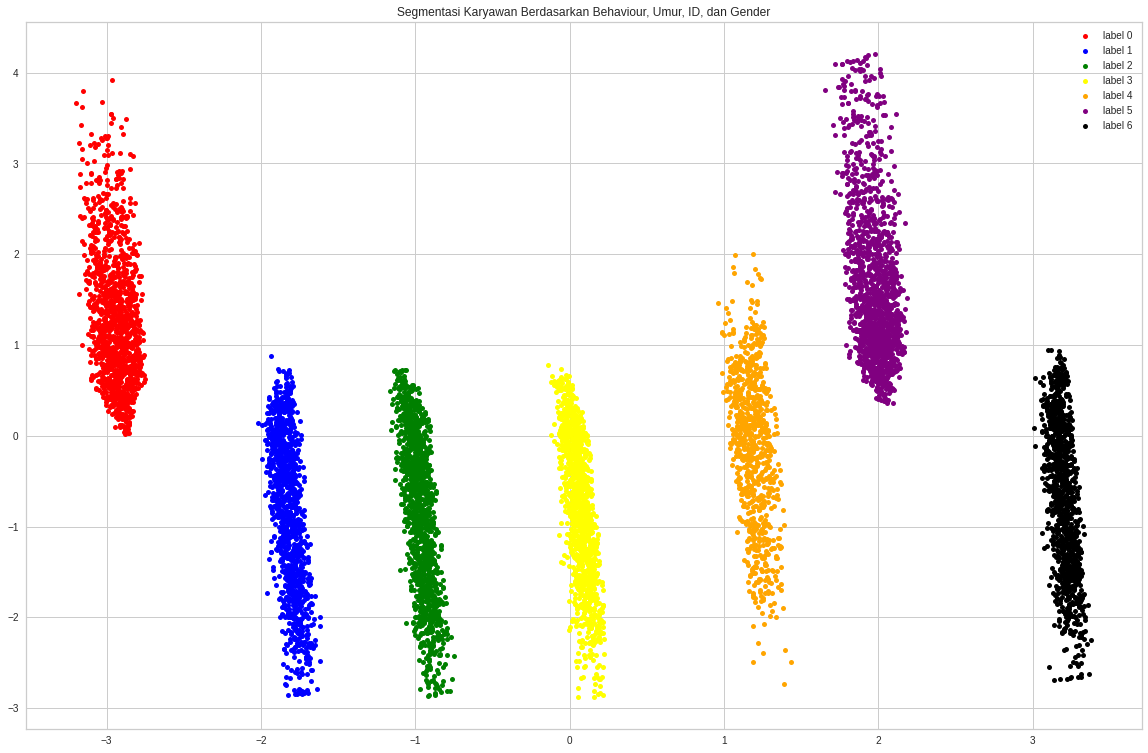

In [ ]:
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'black',
          7: 'pink'}

names = {0: 'label 0', 
         1: 'label 1', 
         2: 'label 2', 
         3: 'label 3', 
         4: 'label 4',
         5: 'label 5',
         6: 'label 6',
         7: 'label 7'}

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title('Segmentasi Karyawan Berdasarkan Behaviour, Umur, ID, dan Gender')
plt.show()

## Evaluate Model

Untuk melihat seberapa baik model clustering, dapat dievaluasi menggunakan 2 cara berikut:
* **Davis-Bouldin Index**
> Salah satu metode evaluasi internal yang mengukur evaluasi cluster pada suatu metode pengelompokan yang didasarkan pada nilai kohesi dan separasi. Semakin kecil nilai DBI yang diperoleh non-negative dan mendekati angka 0 maka model cluster yang telah dibuat sudah bagus

* **Silhouette Coefficient**
> Merupakan gabungan dari dua metode cohesion yang berfungsi untuk mengukur seberapa dekat relasi antara objek dalam sebuah cluster. Nilai hasil silhouette coefficient terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, semakin baik pengelompokkan data dalam satu cluster. 


In [ ]:
print(f'Davies-Bouldin Index = {davies_bouldin_score(x_scaled, labels)}')
print(f'Silhouette Score = {silhouette_score(x_scaled, labels)}')

Davies-Bouldin Index = 1.0643463736524261
Silhouette Score = 0.3913592582495096


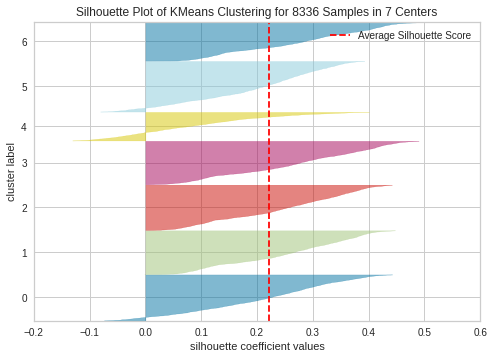

In [ ]:
viz_sil = SilhouetteVisualizer(kmean, colors='yellowbrick')
viz_sil.fit(x_scaled.drop(columns='labels', axis=1))
viz_sil.show()

**Insight**
> Dari proses evaluasi model diatas, dapat disimpulkan bahwa model yang dibuat sudah baik karena nilai DBI menunjukkan angka **1.064** yang mana hampir mendekati 0. 

> Dari grafik Silhouette menunjukkan bahwa semua cluster table telah melewati garis average silhouette score, yang menandakan model yang kita miliki sudah baik. Koefisien yang dihasilkan oleh Silhouette adalah **0.391** dan tidak mendekati minus. 